In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv("/content/train_dataset_final1.csv")
validation = pd.read_csv("/content/validate_dataset_final.csv")


In [2]:
print("Shape:", train.shape)
print(train.head())

Shape: (25247, 27)
   Customer_ID  marriage  sex  education  LIMIT_BAL   age  pay_0  pay_2  \
0         5017         2    0          2      60000  25.0      2      2   
1         5018         2    1          1     290000  24.0      0      0   
2         5019         1    0          2     180000  63.0      0      0   
3         5020         1    1          2     210000  43.0      0      0   
4         5021         2    0          1     280000  32.0     -2     -2   

   pay_3  pay_4  ...  Bill_amt6  pay_amt1  pay_amt2  pay_amt3  pay_amt4  \
0      2      0  ...   20750.63   2000.21      0.00   1134.85   1821.78   
1     -2     -2  ...    1350.30      0.00      0.17      0.00   2700.10   
2      0      0  ...   52991.51   2086.94   2199.99   1845.66   2000.35   
3      0      0  ...   76945.47   3348.07   3380.91   3400.45   2683.97   
4     -2     -2  ...       1.35    999.78   3186.27  45027.78   2100.09   

   pay_amt5  pay_amt6  AVG_Bill_amt  PAY_TO_BILL_ratio  next_month_default  
0 

In [3]:
print(train.info())
print(train.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

In [4]:
print(train.columns.tolist())

['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default']


In [5]:
train.isnull().sum()

,0
Customer_ID,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,126
pay_0,0
pay_2,0
pay_3,0
pay_4,0


In [6]:
train['age'] = train['age'].fillna(train['age'].median())
train['age'].isnull().sum()

np.int64(0)

In [ ]:
print(train['next_month_default'].value_counts())

In [7]:
custom_palette = ["#ede4e6","#c7a8b0","#a16c7a","#68434c","#4b3037","#2d1d21","#921F45"]
sns.set_palette(custom_palette)

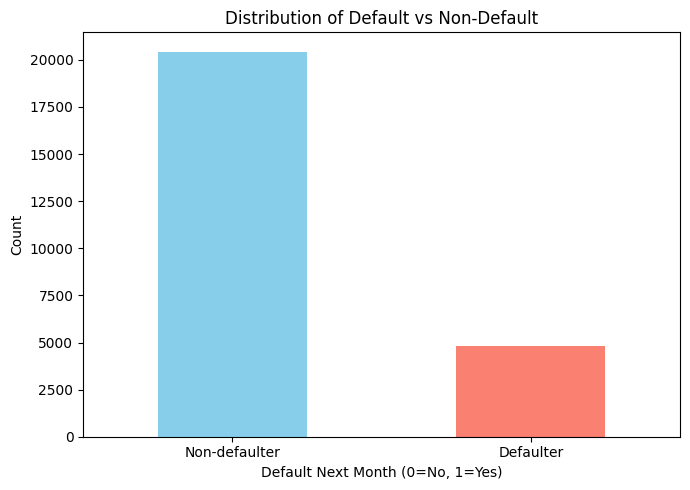

In [16]:
# Bar plot for count distribution
fig, ax = plt.subplots(figsize=(7, 5))
train['next_month_default'].value_counts().plot(kind='bar',ax=ax,color=['skyblue','salmon'])
ax.set_title('Distribution of Default vs Non-Default')
ax.set_xlabel('Default Next Month (0=No, 1=Yes)')
ax.set_ylabel('Count')
ax.set_xticklabels(['Non-defaulter', 'Defaulter'], rotation=0)

# Display plot
plt.tight_layout()
plt.show()

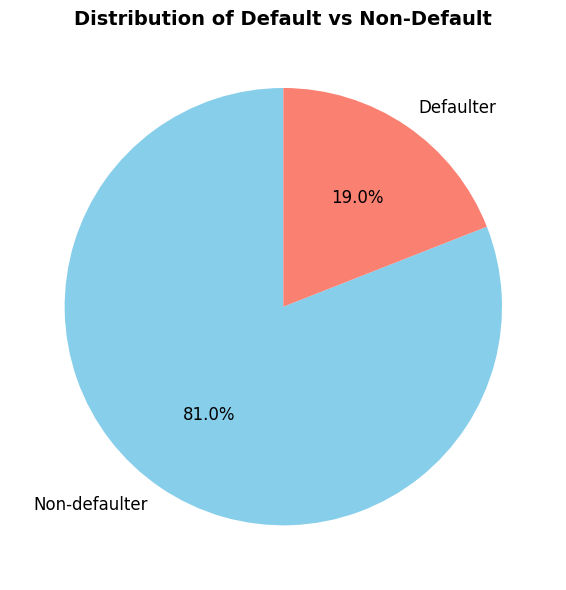

In [70]:
fig, ax = plt.subplots(figsize=(6, 6))
counts = train['next_month_default'].value_counts()
labels = ['Non-defaulter', 'Defaulter']
colors = ['skyblue', 'salmon']

# Plot
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 12})
ax.set_title('Distribution of Default vs Non-Default', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

personal info

In [8]:
train[['LIMIT_BAL', 'sex', 'education', 'marriage', 'age']].describe()

,LIMIT_BAL,sex,education,marriage,age
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000
mean,168342.060443,0.604111,1.852101,1.551907,35.431022
std,129892.784807,0.489050,0.797379,0.522629,9.152635
min,10000.000000,0.000000,0.000000,0.000000,21.000000
25%,50000.000000,0.000000,1.000000,1.000000,28.000000
50%,140000.000000,1.000000,2.000000,2.000000,34.000000
75%,240000.000000,1.000000,2.000000,2.000000,41.000000
max,1000000.000000,1.000000,6.000000,3.000000,79.000000


In [9]:


train['marriage'].value_counts()

,count
marriage,
2,13441
1,11480
3,273
0,53


In [10]:
train['education'].value_counts()

,count
education,
2,11717
1,8988
3,4115
5,253
4,116
6,44
0,14


In [11]:
train['sex'].value_counts()

,count
sex,
1,15252
0,9995


In [12]:
# Mapping sex, education, marriage into clean numerical forms
train['sex'] = train['sex'].map({1: 1, 0: 0})  # 1 = Male, 0 = Female
train['education'] = train['education'].replace({0: 4, 5: 4, 6: 4})  # group uncommon as "others" = 4
train['marriage'] = train['marriage'].replace({0: 3})  # group unknown as "others" = 3


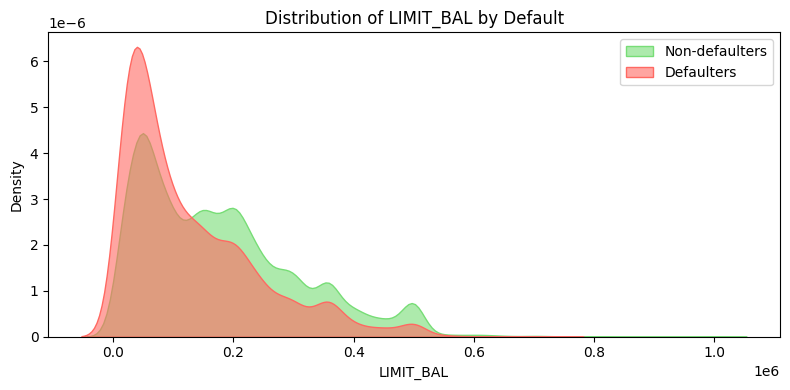

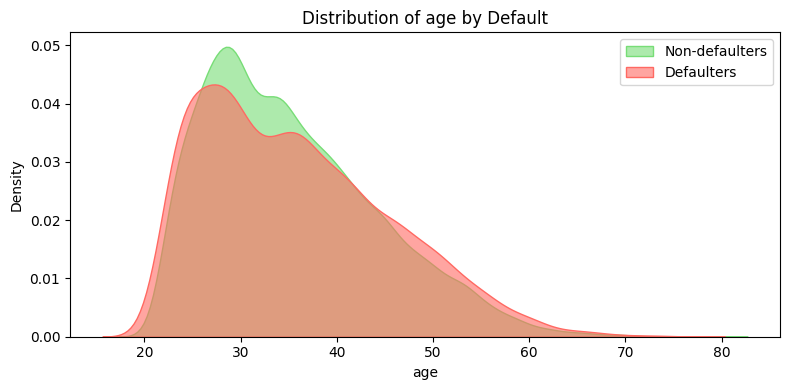

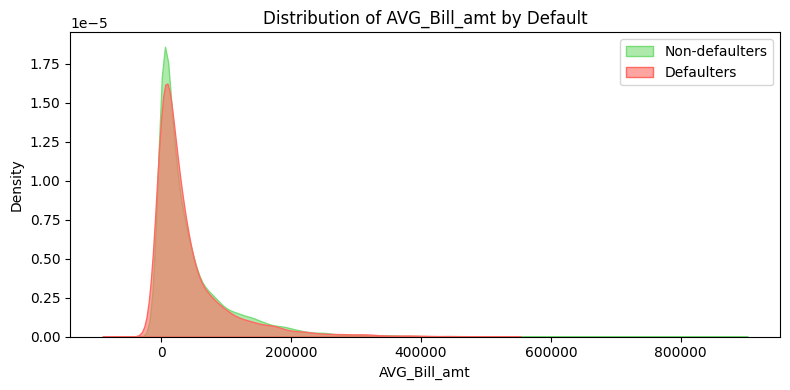

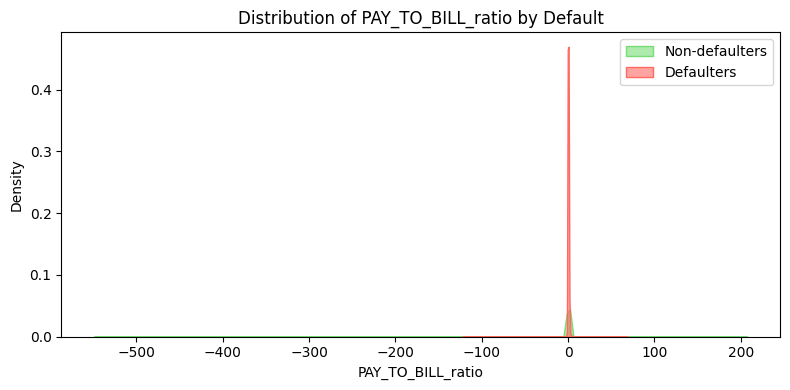

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features to analyze
num_cols = ['LIMIT_BAL', 'age', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio']

# Optional: set a color palette for consistency
sns.set_palette(['#77DD76', '#FF6962'])

# Loop through each numeric column
for col in num_cols:
    plt.figure(figsize=(8, 4))
    plt.title(f'Distribution of {col} by Default')

    # Split data by default class
    default_0 = train[train['next_month_default'] == 0][col]
    default_1 = train[train['next_month_default'] == 1][col]

    # KDE plots
    sns.kdeplot(default_0, fill=True, label='Non-defaulters', alpha=0.6)
    sns.kdeplot(default_1, fill=True, label='Defaulters', alpha=0.6)

    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()


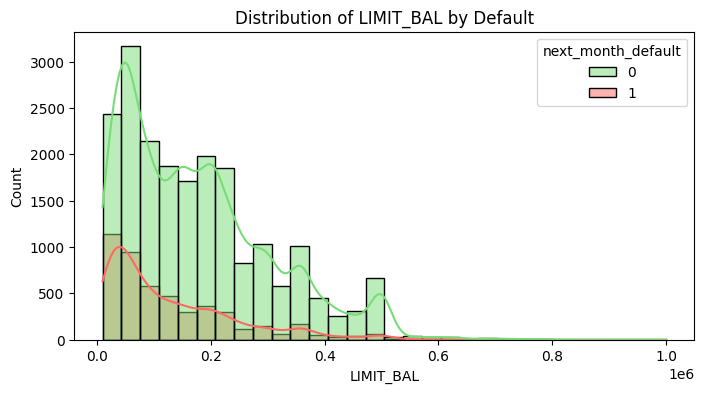

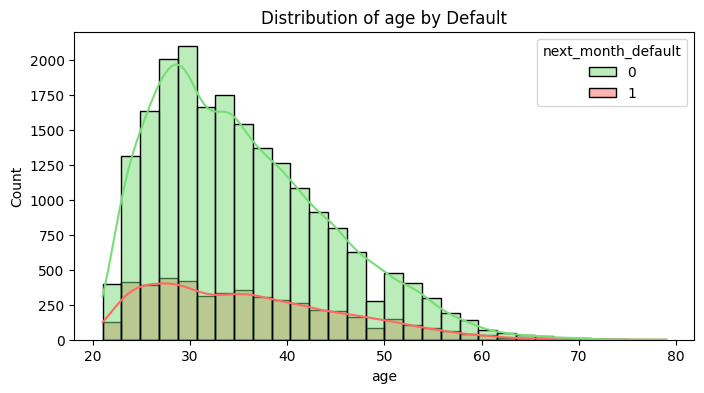

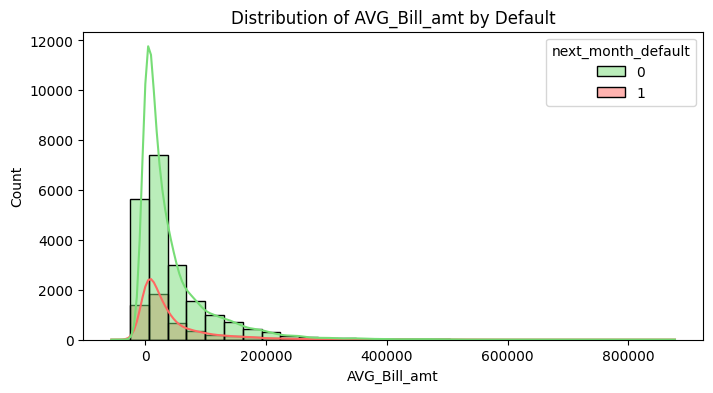

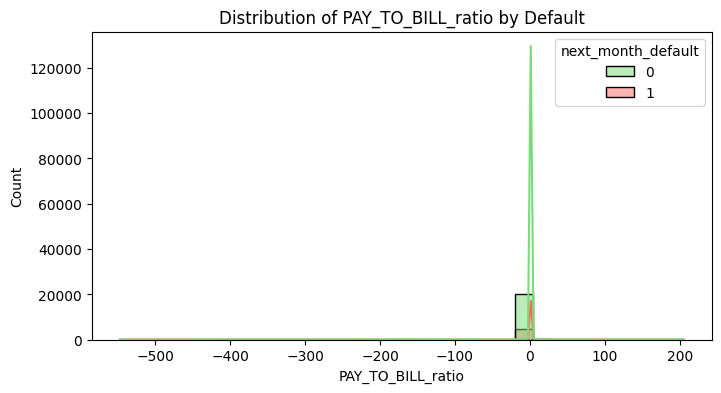

In [17]:
%matplotlib inline
import os
num_cols = ['LIMIT_BAL', 'age', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio']
#os.makedirs('eda_analysis', exist_ok=True)
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(train, x=col, hue='next_month_default', kde=True, bins=30)
    plt.title(f'Distribution of {col} by Default')
    #plt.savefig(f'eda_analysis/{col}_dist_by_default.png')
    #plt.close()
    plt.show()

<Axes: xlabel='next_month_default', ylabel='PAY_TO_BILL_ratio'>

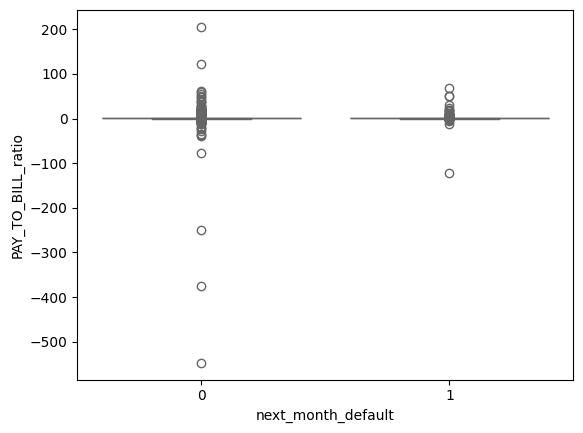

In [18]:
sns.boxplot(x='next_month_default', y='PAY_TO_BILL_ratio', data=train)


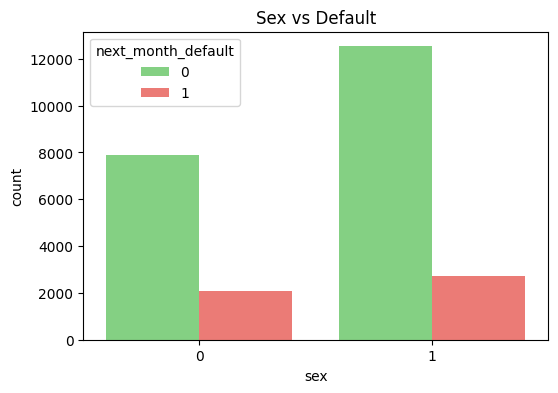

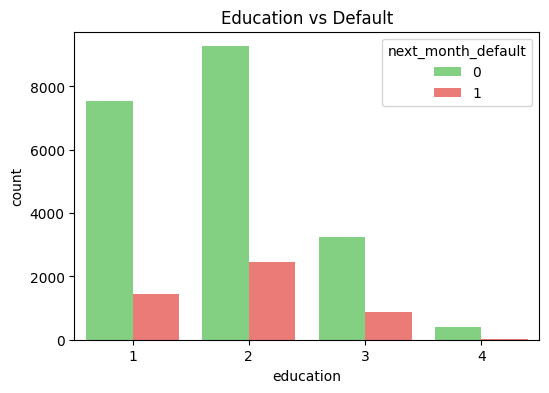

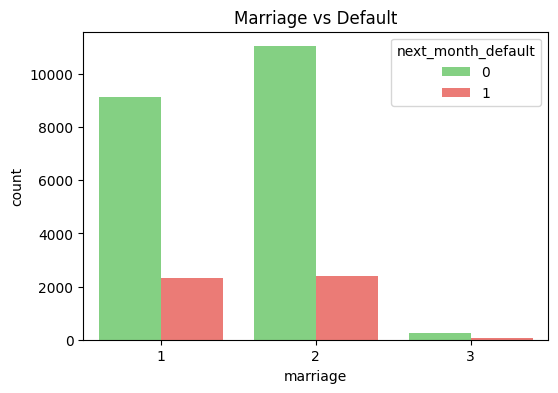

In [19]:
cat_cols = ['sex', 'education', 'marriage']
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=train, x=col, hue='next_month_default')
    plt.title(f'{col.title()} vs Default')

    plt.show()

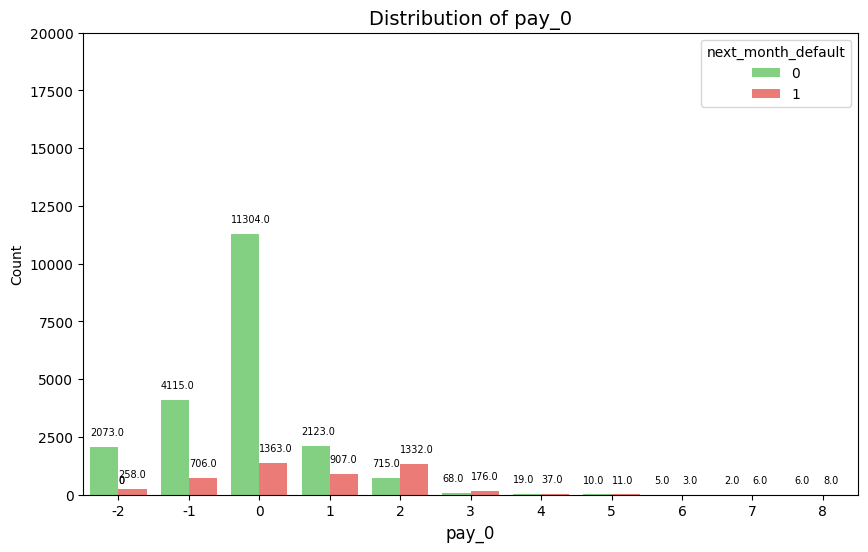

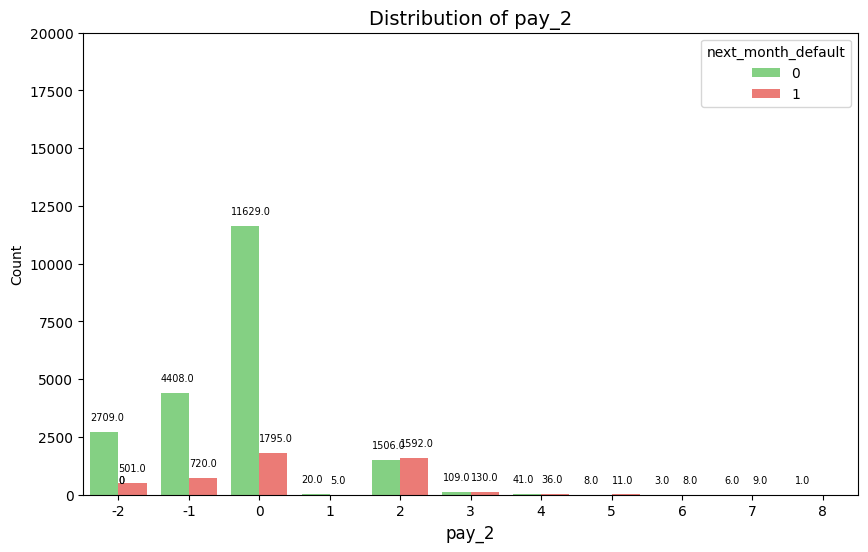

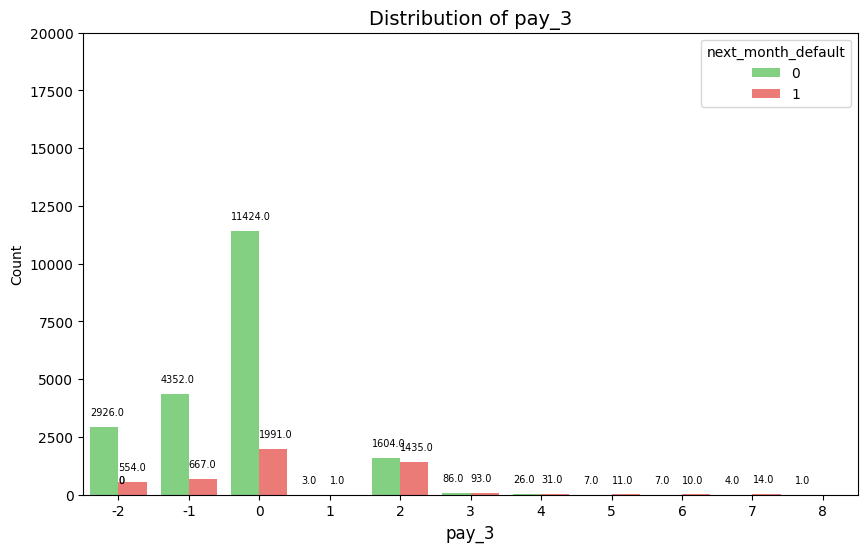

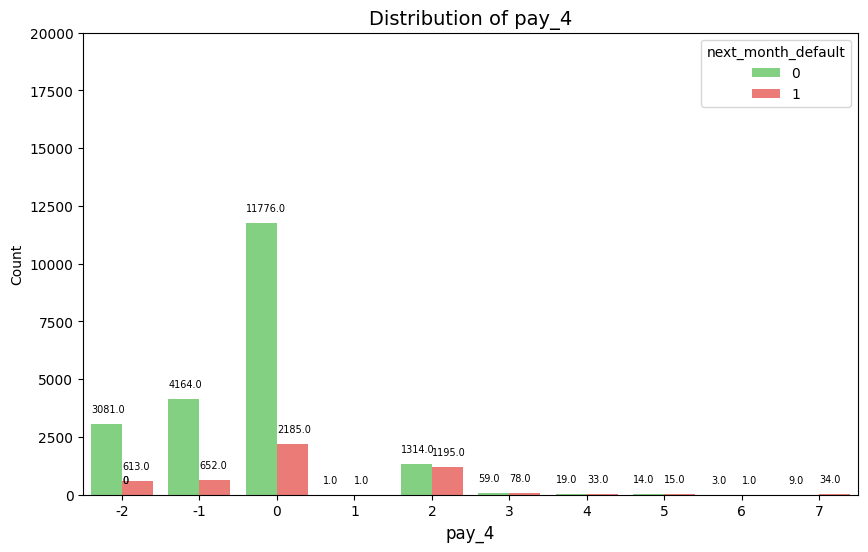

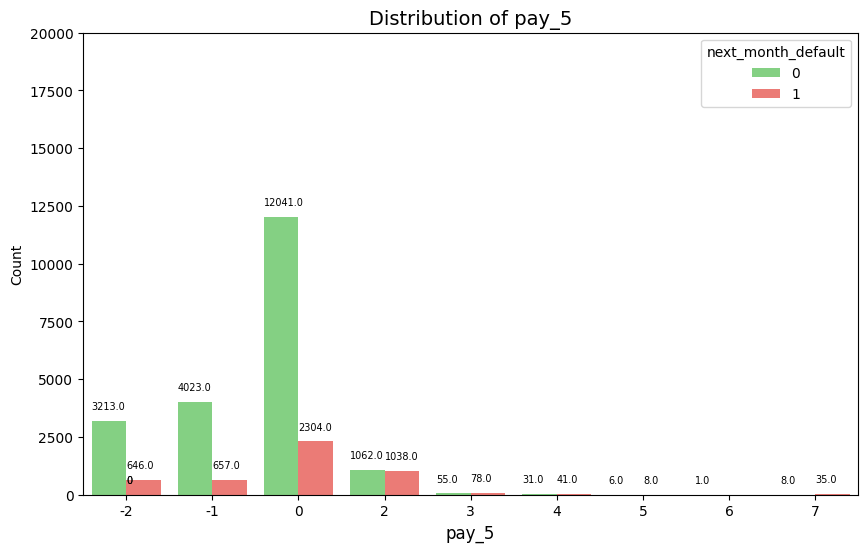

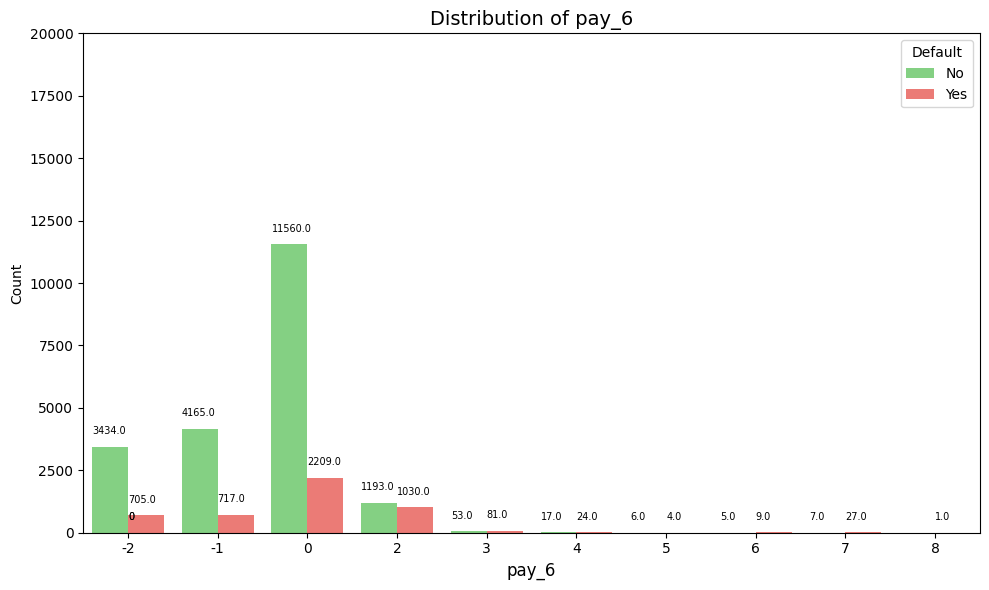

In [21]:
# PAY_X status vs default
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
for col in pay_cols:

    plt.figure(figsize=(10, 6)) # Adjust figure size for better visualization of 6 plots


    ax = sns.countplot(data=train, x=col, hue='next_month_default')
    plt.ylim(0, 20000)
    plt.xlabel(col, fontsize=12) # Reduced font size
    plt.ylabel('Count') # Added a ylabel
    plt.title(f'Distribution of {col}', fontsize=14) # Adjusted title font size

    # Annotate each bar
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x(), p.get_height()+500), fontsize = 7)
 # Reduced annotation font size
plt.legend(title='Default', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

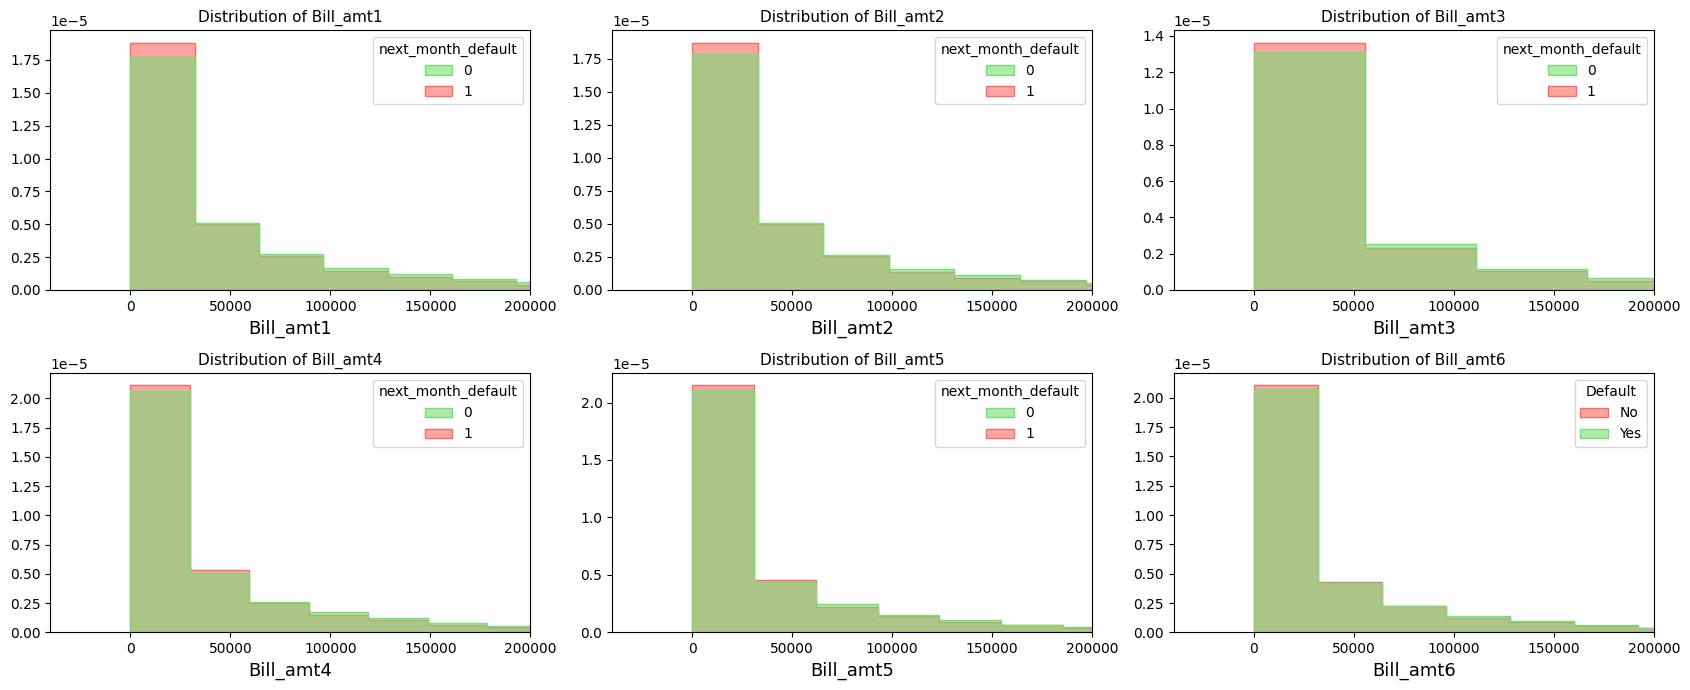

In [22]:
BILL_AMT_cols = ['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6']
plt.figure(figsize=(17, 7))

for i, col in enumerate(BILL_AMT_cols):
    plt.subplot(2, 3, i + 1)

    sns.histplot(data=train, x=col, hue='next_month_default', bins=30, element='step', stat='density',
                 common_norm=False, palette=['#77DD76', '#FF6962'], alpha=0.6)

    plt.xlim(-40000, 200000)
    plt.xlabel(col, fontsize=13)
    plt.ylabel('')
    plt.title(f'Distribution of {col}', fontsize=11)
    plt.tight_layout()

plt.legend(title='Default', labels=['No', 'Yes'], loc='upper right')
plt.show()


<ipython-input-23-3029689983>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train.loc[(train['next_month_default'] == 0), col], label = 'No Default', shade = True,color='#77DD76')
<ipython-input-23-3029689983>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train.loc[(train['next_month_default'] == 1), col], label = 'Default', shade = True, color='#FF6962')
<ipython-input-23-3029689983>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train.loc[(train['next_month_default'] == 0), col], label = 'No Default', shade = True,color='#77DD76')
<ipython-input-23-3029689983>:7: FutureWarning: 

`shade` is now deprecated in fa

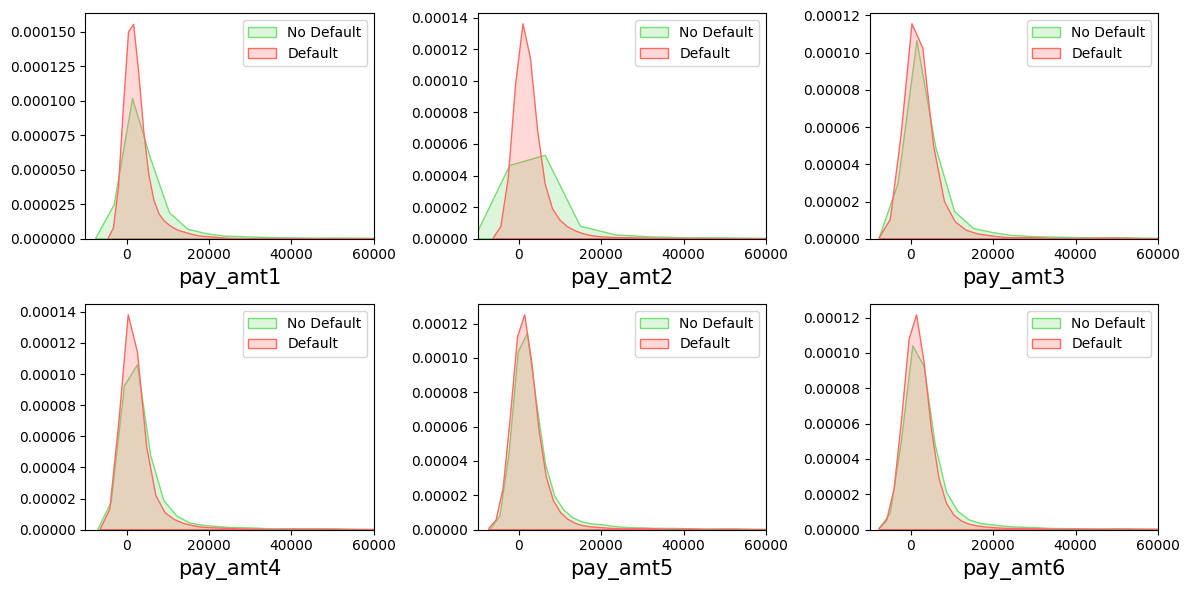

In [23]:
PAY_AMT_cols = ['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
plt.figure(figsize=(12,6))

for i,col in enumerate(PAY_AMT_cols):
    plt.subplot(2,3,i + 1)
    sns.kdeplot(train.loc[(train['next_month_default'] == 0), col], label = 'No Default', shade = True,color='#77DD76')
    sns.kdeplot(train.loc[(train['next_month_default'] == 1), col], label = 'Default', shade = True, color='#FF6962')
    plt.xlim(-10000,60000)
    plt.xlabel(col,fontsize=15)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

#plt.savefig('images/continuousPAYAMT.svg')
plt.show()

In [24]:
# Drop customer ID before training
train.drop(columns=['Customer_ID'], inplace=True)

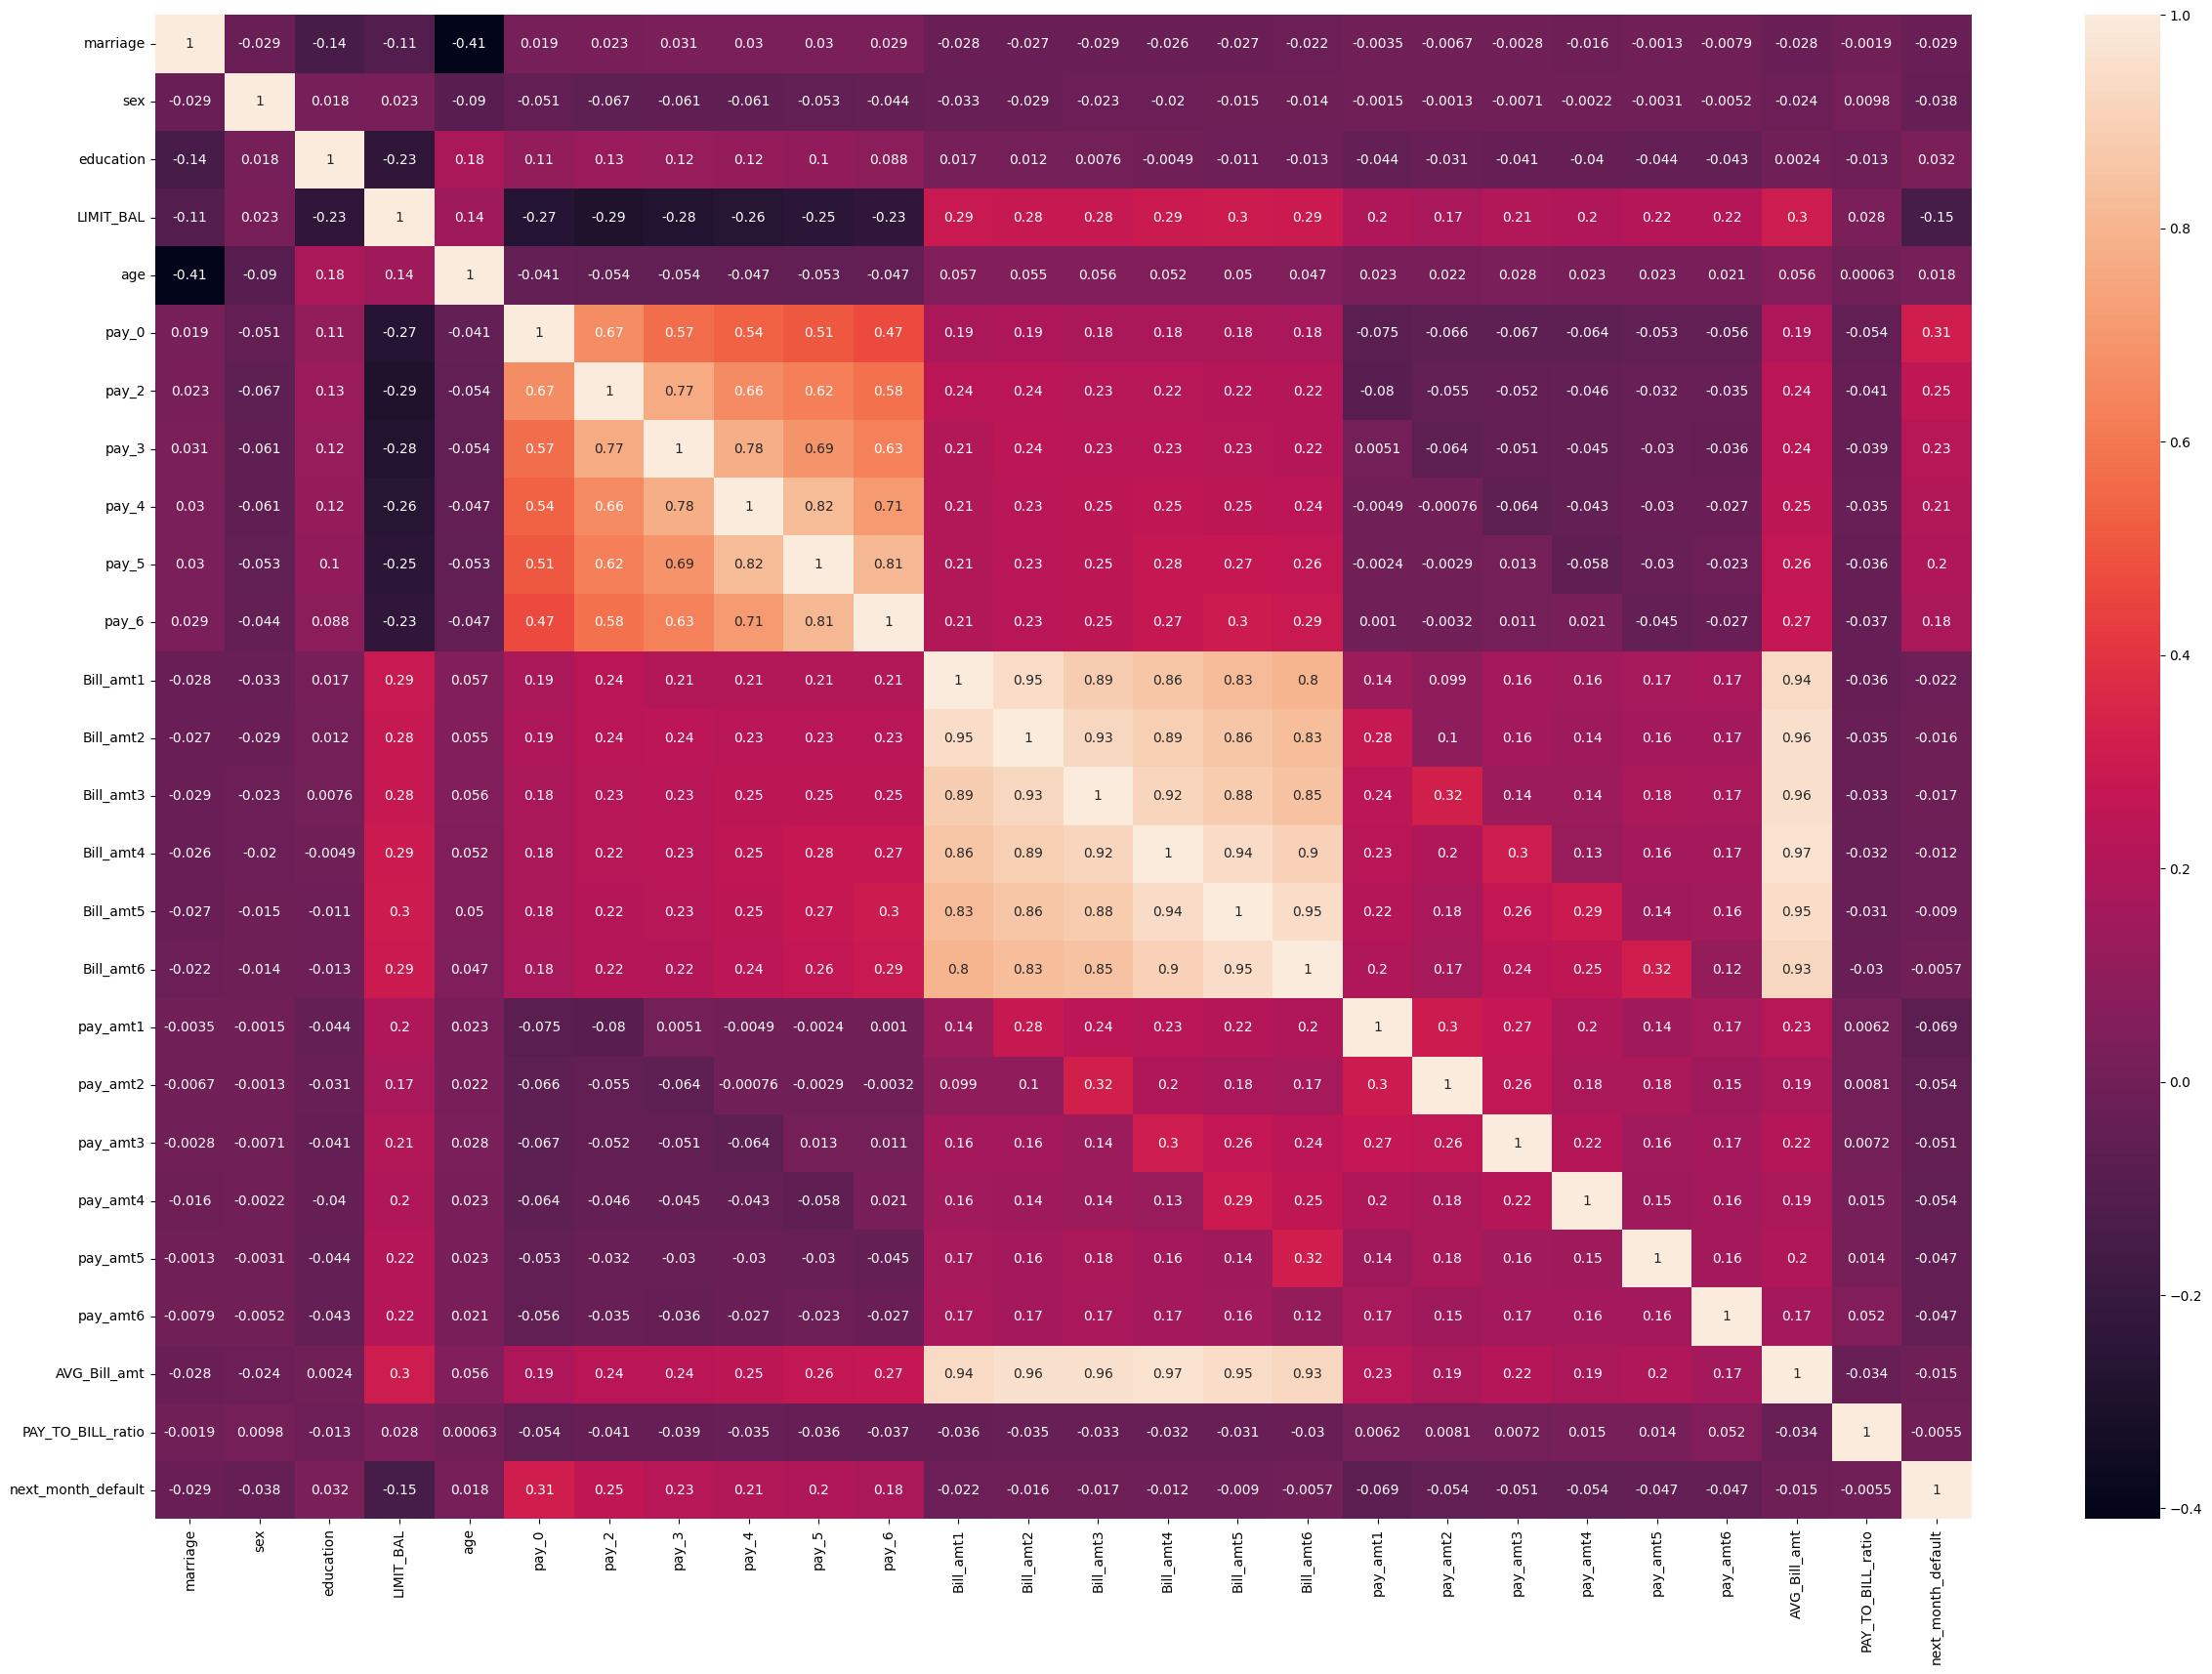

In [25]:
plt.subplots(figsize=(30,20))
sns.heatmap(train.corr(), annot=True)
plt.show()

In [26]:
categorical=['marriage', 'sex', 'education','next_month_default']
all_cols=list(train.columns[:])
numerical=[x for x in all_cols if x not in categorical]
train[categorical] = train[categorical].astype('category')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   marriage            25247 non-null  category
 1   sex                 25247 non-null  category
 2   education           25247 non-null  category
 3   LIMIT_BAL           25247 non-null  int64   
 4   age                 25247 non-null  float64 
 5   pay_0               25247 non-null  int64   
 6   pay_2               25247 non-null  int64   
 7   pay_3               25247 non-null  int64   
 8   pay_4               25247 non-null  int64   
 9   pay_5               25247 non-null  int64   
 10  pay_6               25247 non-null  int64   
 11  Bill_amt1           25247 non-null  float64 
 12  Bill_amt2           25247 non-null  float64 
 13  Bill_amt3           25247 non-null  float64 
 14  Bill_amt4           25247 non-null  float64 
 15  Bill_amt5           25247 non-null  

In [27]:
 #4. Save preprocessed data
import os
os.makedirs("data", exist_ok=True)
train.to_csv('data/train_processed.csv', index=False)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
# 1. Load processed data
# -----------------------------
df = pd.read_csv("data/train_processed.csv")
print(f"Loaded processed data with shape: {df.shape}\n")

# -----------------------------
# 2. Prepare features and target
# -----------------------------
X = df.drop(columns=["next_month_default"])
y = df["next_month_default"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print(f'- Defaulters:\t {len(y_train[y_train==1])}')
print(f'- Non-defaulters: {len(y_train[y_train==0])}')
print('Test set shape: ', np.shape(X_test))
print(f'- Defaulters:\t {len(y_test[y_test==1])}')
print(f'- Non-defaulters: {len(y_test[y_test==0])}')

Loaded processed data with shape: (25247, 26)

- Defaulters:	 3845
- Non-defaulters: 16352
Test set shape:  (5050, 25)
- Defaulters:	 962
- Non-defaulters: 4088


In [29]:
print( X_train.columns.tolist())

['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio']


In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
scaler = MinMaxScaler()
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()
scale_cols = ['LIMIT_BAL', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1',
              'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1', 'pay_amt2',
              'pay_amt3', 'pay_amt4','pay_amt5', 'pay_amt6']

for col in scale_cols:
    X_train_norm[col] = scaler.fit_transform(X_train[[col]])
    X_test_norm[col] = scaler.transform(X_test[[col]])

In [31]:
print( X_train_norm.columns.tolist())

['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio']


In [32]:
scaler = StandardScaler()
X_train_std = X_train.copy()
X_test_std = X_test.copy()
for col in scale_cols:
    X_train_norm[col] = scaler.fit_transform(X_train[[col]])
    X_test_norm[col] = scaler.transform(X_test[[col]])

In [33]:
print( X_train_norm.columns.tolist())

['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio']


<ipython-input-34-2477515541>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(labels=numeric, rotation=25)
<ipython-input-34-2477515541>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(labels=numeric, rotation=25)


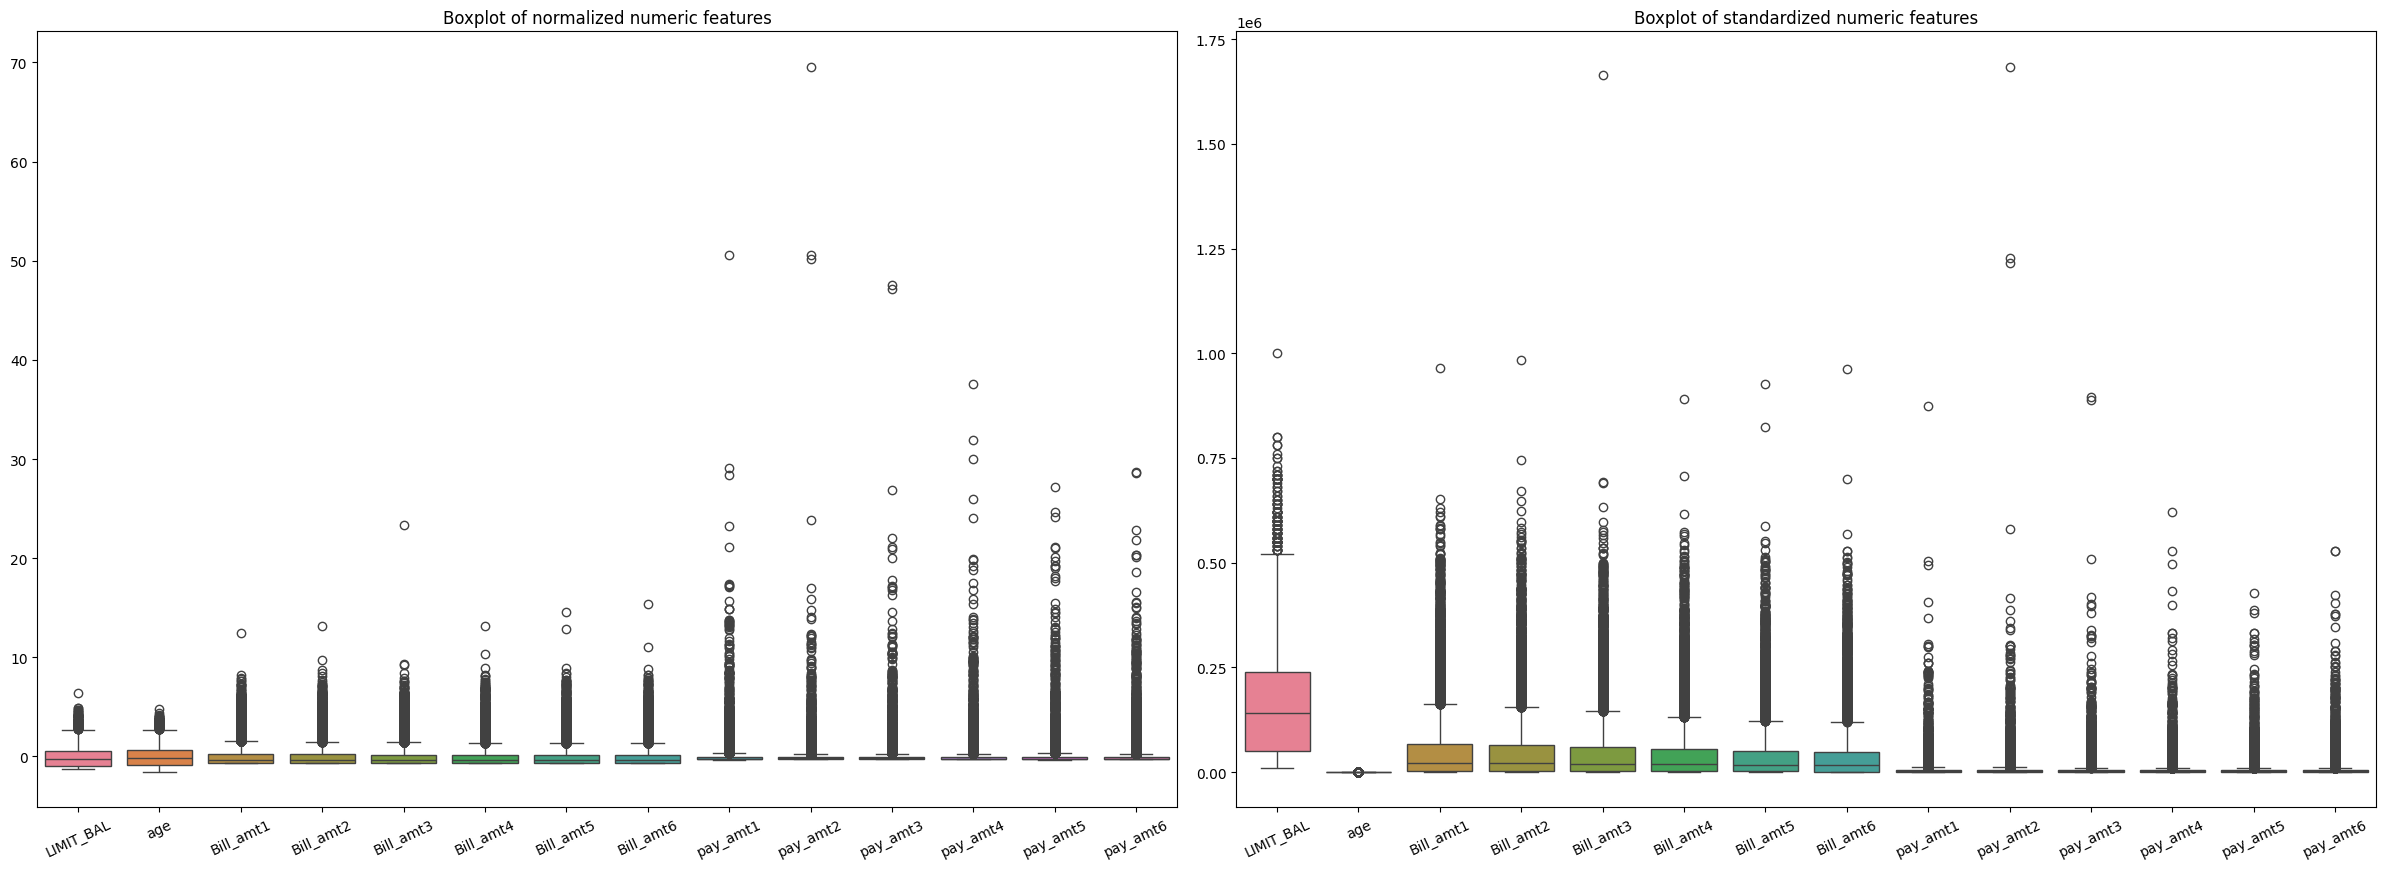

In [34]:
sns.set_color_codes('deep')
numeric = ['LIMIT_BAL', 'age', 'Bill_amt1','Bill_amt2', 'Bill_amt3', 'Bill_amt4',
           'Bill_amt5', 'Bill_amt6', 'pay_amt1', 'pay_amt2',
              'pay_amt3', 'pay_amt4','pay_amt5', 'pay_amt6']
fig, axs = plt.subplots(1, 2, figsize=(24,9))

sns.boxplot(data=X_train_norm[numeric], ax=axs[0])
axs[0].set_title('Boxplot of normalized numeric features')
axs[0].set_xticklabels(labels=numeric, rotation=25)
axs[0].set_xlabel(' ')

sns.boxplot(data=X_train_std[numeric], ax=axs[1])
axs[1].set_title('Boxplot of standardized numeric features')
axs[1].set_xticklabels(labels=numeric, rotation=25)
axs[1].set_xlabel(' ')

fig.tight_layout()
#plt.savefig('images/normalized.svg')
plt.show()

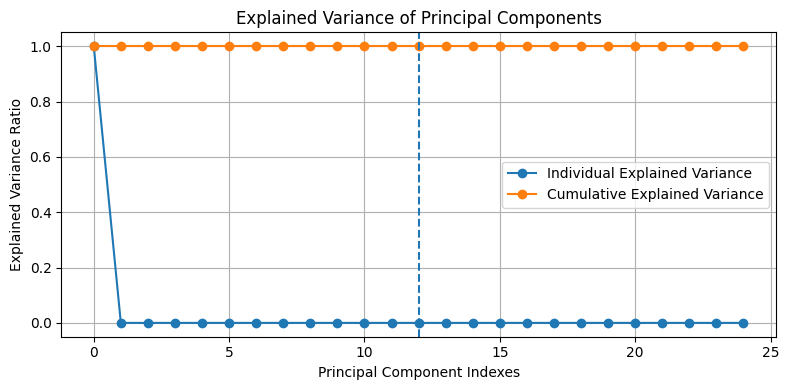

In [35]:
pc = len(X_train_norm.columns.values) #number columns = 25
pca = PCA(n_components=pc)
pca.fit(X_train_norm)

sns.reset_orig()
sns.set_color_codes('pastel')
plt.figure(figsize = (8,4))
plt.grid()
plt.title('Explained Variance of Principal Components')
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.legend(["Individual Explained Variance", "Cumulative Explained Variance"])
plt.xlabel('Principal Component Indexes')
plt.ylabel('Explained Variance Ratio')

plt.tight_layout()
plt.axvline(12, 0, ls='--')
plt.show()


In [36]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
indexes = ['PC' + str(i) for i in range(1, pc+1)]
cumsum_df = pd.DataFrame(data=cumsum, index=indexes, columns=['var1'])
cumsum_df['var2'] = pd.Series([round(val, 4) for val in cumsum_df['var1']], index = cumsum_df.index)
cumsum_df['Cumulative Explained Variance'] = pd.Series(["{0:.2f}%".format(val * 100) for val in cumsum_df['var2']], index = cumsum_df.index)
cumsum_df = cumsum_df.drop(['var1','var2'], axis=1, inplace=False)
cumsum_df.T.iloc[:,:15]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
Cumulative Explained Variance,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%


In [37]:
# Check for constant columns
print((X_train_norm.nunique() == 1).sum())

# Check for duplicate columns
print(X_train_norm.T.duplicated().sum())


0
0


In [38]:
scaler = MinMaxScaler()
X_train_norm = pd.DataFrame(scaler.fit_transform(X_train[scale_cols]), columns=scale_cols)
X_test_norm = pd.DataFrame(scaler.transform(X_test[scale_cols]), columns=scale_cols)


In [39]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.0001)
X_train_reduced = selector.fit_transform(X_train_norm)


In [40]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_reduced)


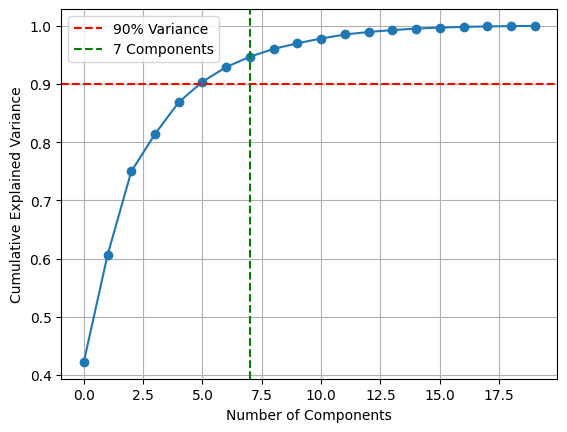

In [41]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.axhline(0.9, color='red', linestyle='--', label='90% Variance')
plt.axvline(7, color='green', linestyle='--', label='7 Components')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.grid()
plt.show()


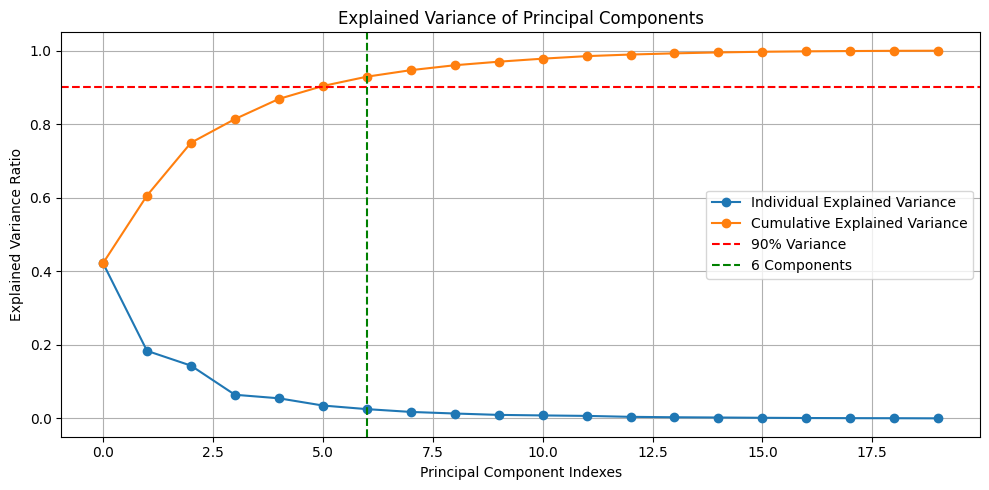

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Fit PCA
pca = PCA()
pca.fit(X_train_norm)  # your normalized feature set

# Extract variance
individual_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(individual_var)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(individual_var, marker='o', label='Individual Explained Variance')
plt.plot(cumulative_var, marker='o', label='Cumulative Explained Variance')

# Highlight 90% threshold and number of components needed
target = 0.90
n_components = np.argmax(cumulative_var >= target) + 1

plt.axhline(target, color='red', linestyle='--', label='90% Variance')
plt.axvline(n_components, color='green', linestyle='--', label=f'{n_components} Components')

# Labels and styles
plt.title('Explained Variance of Principal Components')
plt.xlabel('Principal Component Indexes')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [43]:
import pandas as pd
cumsum = np.cumsum(pca.explained_variance_ratio_)
indexes = ['PC' + str(i) for i in range(1, len(cumsum)+1)] # Corrected to use the length of cumsum
cumsum_df = pd.DataFrame(data=cumsum, index=indexes, columns=['var1'])
cumsum_df['var2'] = pd.Series([round(val, 4) for val in cumsum_df['var1']], index = cumsum_df.index)
cumsum_df['Cumulative Explained Variance'] = pd.Series(["{0:.2f}%".format(val * 100) for val in cumsum_df['var2']], index = cumsum_df.index)
cumsum_df = cumsum_df.drop(['var1','var2'], axis=1, inplace=False)
display(cumsum_df.T.iloc[:,:16]) # Use display to show the DataFrame

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
Cumulative Explained Variance,42.23%,60.61%,74.97%,81.41%,86.89%,90.40%,92.94%,94.71%,96.05%,97.01%,97.84%,98.53%,98.96%,99.28%,99.54%,99.71%


In [44]:
pc=14
pca = PCA(n_components=pc)
pca.fit(X_train_norm)
X_train_pca = pd.DataFrame(pca.transform(X_train_norm))
X_test_pca = pd.DataFrame(pca.transform(X_test_norm))
X_train_pca.columns = ['PC' + str(i) for i in range(1, pc+1)]
X_test_pca.columns = ['PC' + str(i) for i in range(1, pc+1)]
X_train_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-0.234492,0.149081,0.269843,0.020862,-0.025554,-0.018883,-0.009846,-0.006822,-0.000732,0.074630,0.061931,-0.066908,-0.013493,-0.014841
1,-0.416836,-0.033881,0.039965,0.018888,-0.121483,0.006526,-0.058915,0.027833,-0.034663,-0.010605,0.014393,0.018974,-0.007692,-0.012728
2,-0.227844,-0.048942,-0.087683,0.086177,0.049022,-0.012603,-0.010917,-0.005948,-0.002641,-0.023331,0.002495,-0.001991,-0.000238,-0.014815
3,-0.207190,-0.027859,0.213060,-0.041439,-0.099493,-0.023097,-0.005842,-0.005129,-0.000668,0.005985,0.000659,0.003781,-0.002301,-0.005195
4,0.341904,-0.201974,-0.037549,0.108503,-0.041229,-0.153732,0.129566,-0.002308,0.095468,-0.002044,0.011495,0.001827,0.014119,-0.000159


In [45]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=24)
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)
class_count = [y_train_smote[y_train_smote == 0].count(), y_train_smote[y_train_smote == 1].count()]
class_count_df = pd.DataFrame(data=class_count, index=['Non-defaulters', 'Defaulters'], columns=['Number'])
class_count_df['var2'] = pd.Series([round(val/class_count_df['Number'].sum(axis=0), 4) for val in class_count_df['Number']], index = class_count_df.index)
class_count_df['Percentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in class_count_df['var2']], index = class_count_df.index)
class_count_df = class_count_df.drop(['var2'], axis=1, inplace=False)
print('Training set class proportion after SMOTE Oversampling')
class_count_df


Training set class proportion after SMOTE Oversampling


,Number,Percentage
Non-defaulters,16352,50.00%
Defaulters,16352,50.00%


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Number']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Number'}, axis=1)
              .sort_values('Number', ascending=True))
  xs = counted['Number']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = class_count_df.sort_values('Number', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Number')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Number']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Number'}, axis=1)
              .sort_values('Number', ascending=True))
  xs = counted['Number']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Number', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Number')
_ = plt.ylabel('count()')

MODEL TRAINING


In [46]:
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score,classification_report, confusion_matrix,precision_recall_curve
from sklearn.metrics import fbeta_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt # Import matplotlib for plotting

# Define models and their parameters
models = {
    "Logistic Regression": (LogisticRegression(max_iter=1000), {'clf__C': [0.1, 1, 10]}),
    "Random Forest": (RandomForestClassifier(), {'clf__n_estimators': [100], 'clf__max_depth': [5, 10]}),
    "Decision Tree": (DecisionTreeClassifier(), {'clf__max_depth': [5, 10, 20]}),
    "KNN": (KNeighborsClassifier(), {'clf__n_neighbors': [3, 5, 7]}),
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {'clf__n_estimators': [100], 'clf__max_depth': [3, 5]})
}

results = {}
grids={}
def run_pipeline(model, param_grid, X_train, y_train, X_test, y_test):
    pipeline = ImbPipeline([
        ('pca', PCA(n_components=12)),
        ('smote', SMOTE(random_state=24)),
        ('clf', model)
    ])

    grid = GridSearchCV(pipeline, param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=1)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)

    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred),
        'F2-score': fbeta_score(y_test, y_pred, beta=2),
        'AUC': roc_auc_score(y_test, y_pred),
        'Classification Report': classification_report(y_test, y_pred, digits=3),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)


               }
               #print(classification_report(y_test, y_pred))

    return metrics, grid.best_params_,grid


for name, (model, params) in models.items():
    print(f"Running {name}...")
    scores, best_params,grid = run_pipeline(model, params, X_train_norm, y_train, X_test_norm, y_test)
    results[name] = scores
    grids[name] = grid
    print(f"Best Params for {name}: {best_params}\n")



Running Logistic Regression...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Params for Logistic Regression: {'clf__C': 0.1}

Running Random Forest...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Params for Random Forest: {'clf__max_depth': 10, 'clf__n_estimators': 100}

Running Decision Tree...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Params for Decision Tree: {'clf__max_depth': 5}

Running KNN...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Params for KNN: {'clf__n_neighbors': 7}

Running XGBoost...
Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:54:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Params for XGBoost: {'clf__max_depth': 3, 'clf__n_estimators': 100}




=== Summary of All Models (Sorted by F1-score) ===
                     Accuracy    Recall  Precision  F1-score  F2-score  \
Random Forest        0.796238  0.548857   0.470169  0.506475  0.531080   
XGBoost              0.766139  0.595634   0.419780  0.492480  0.549588   
Decision Tree        0.762574  0.594595   0.414193  0.488263  0.546950   
Logistic Regression  0.686337  0.637214   0.331710  0.436299  0.538097   
KNN                  0.670693  0.621622   0.315235  0.418328  0.520453   

                          AUC  
Random Forest        0.701654  
XGBoost              0.700948  
Decision Tree        0.698349  
Logistic Regression  0.667555  
KNN                  0.651931  

=== Logistic Regression ===
Classification Report:
               precision    recall  f1-score   support

           0      0.891     0.698     0.783      4088
           1      0.332     0.637     0.436       962

    accuracy                          0.686      5050
   macro avg      0.611     0.668     0.

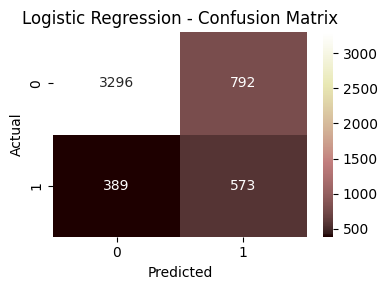


=== Random Forest ===
Classification Report:
               precision    recall  f1-score   support

           0      0.889     0.854     0.872      4088
           1      0.470     0.549     0.506       962

    accuracy                          0.796      5050
   macro avg      0.680     0.702     0.689      5050
weighted avg      0.810     0.796     0.802      5050

Confusion Matrix:
 [[3493  595]
 [ 434  528]]
F-2 score: 0.5310802655401328


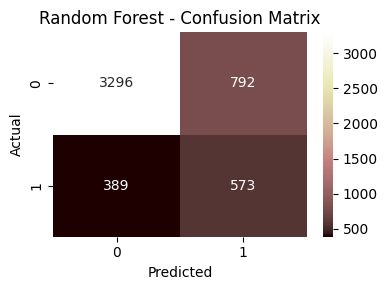


=== Decision Tree ===
Classification Report:
               precision    recall  f1-score   support

           0      0.894     0.802     0.845      4088
           1      0.414     0.595     0.488       962

    accuracy                          0.763      5050
   macro avg      0.654     0.698     0.667      5050
weighted avg      0.802     0.763     0.777      5050

Confusion Matrix:
 [[3279  809]
 [ 390  572]]
F-2 score: 0.5469497035762096


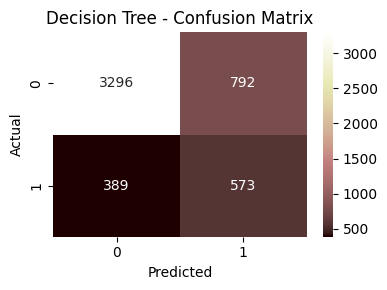


=== KNN ===
Classification Report:
               precision    recall  f1-score   support

           0      0.885     0.682     0.770      4088
           1      0.315     0.622     0.418       962

    accuracy                          0.671      5050
   macro avg      0.600     0.652     0.594      5050
weighted avg      0.776     0.671     0.703      5050

Confusion Matrix:
 [[2789 1299]
 [ 364  598]]
F-2 score: 0.5204525674499565


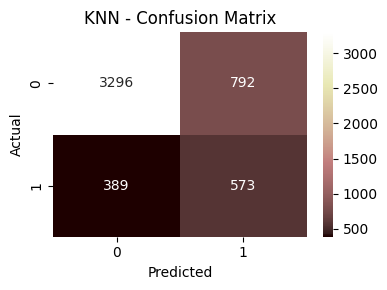


=== XGBoost ===
Classification Report:
               precision    recall  f1-score   support

           0      0.894     0.806     0.848      4088
           1      0.420     0.596     0.492       962

    accuracy                          0.766      5050
   macro avg      0.657     0.701     0.670      5050
weighted avg      0.804     0.766     0.780      5050

Confusion Matrix:
 [[3296  792]
 [ 389  573]]
F-2 score: 0.5495875695376943


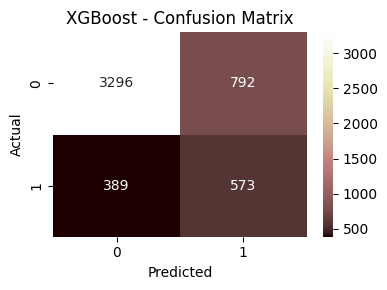

In [71]:
import pandas as pd
results_df = pd.DataFrame(results).T
results_df.sort_values(by="F1-score", ascending=False)
results_df = pd.DataFrame({k: {m: v for m, v in val.items() if isinstance(v, (float, int))} for k, val in results.items()}).T
results_df = results_df.sort_values(by="F1-score", ascending=False)

# Display
print("\n=== Summary of All Models (Sorted by F1-score) ===")
print(results_df)

# Print detailed classification reports and confusion matrices
for model_name, metrics in results.items():
    print(f"\n=== {model_name} ===")
    print("Classification Report:\n", metrics['Classification Report'])
    print("Confusion Matrix:\n", metrics['Confusion Matrix'])
    print(f"F-2 score: {metrics['F2-score']}")
    cm = scores['Confusion Matrix']
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='pink')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


 model with the best F1-score

In [49]:
# Find the model with the best F1-score
best_model_name = results_df['F1-score'].idxmax()
best_f1_score = results_df.loc[best_model_name, 'F1-score']


print("\n Best Model Based on F1-score:")
print(f"Model: {best_model_name}")
print(f"F1-score: {best_f1_score:.4f}")


 Best Model Based on F1-score:
Model: Random Forest
F1-score: 0.5065


Best threshold

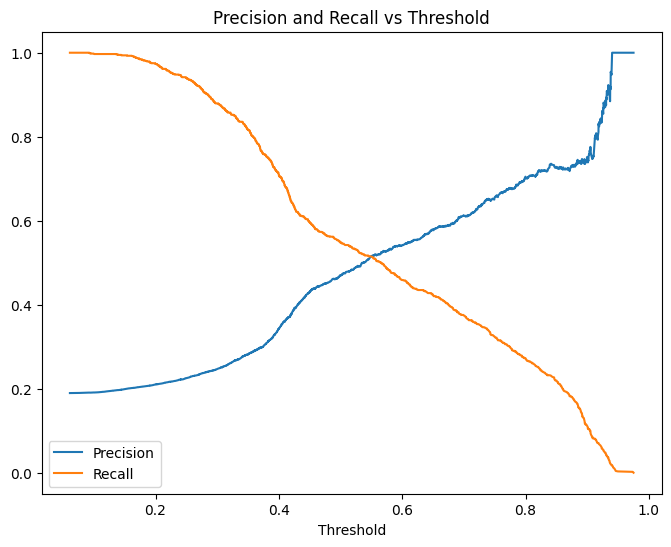


 Best threshold: 0.5514
 Best F1-score at threshold: 0.5159


In [50]:
from sklearn.metrics import precision_recall_curve
best_grid = grids[best_model_name]
best_model_pipeline = best_grid.best_estimator_

# Predict probabilities
y_probs = best_model_pipeline.predict_proba(X_test_norm)[:, 1]

# Compute F1-scores across thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.show()
f1s = 2 * (precision * recall) / (precision + recall + 1e-8)

# Find best threshold
best_threshold = thresholds[np.argmax(f1s)]
print(f"\n Best threshold: {best_threshold:.4f}")
print(f" Best F1-score at threshold: {max(f1s):.4f}")

USE OF SHAP

In [65]:
import shap
import matplotlib.pyplot as plt

# Let's say best_model_name is obtained earlier
best_model_name = results_df.sort_values(by="F1-score", ascending=False).index[0]
print("Best model:", best_model_name)

# Re-train model on original normalized training data (without PCA or SMOTE)
best_model, best_params = models[best_model_name]
best_model.set_params(**{k.split("__")[1]: v for k, v in grids[best_model_name].best_params_.items()})

# Fit on real data
best_model.fit(X_train_norm, y_train)

# SHAP explainer
explainer = shap.Explainer(best_model, X_train_norm)
shap_values = explainer(X_train_norm, check_additivity=False)



Best model: Random Forest


100%|===================| 40344/40394 [13:30<00:01]       

DATA LOADING :VALIDATION DATA

In [51]:
val_df = pd.read_csv("/content/validate_dataset_final.csv")
customer_ids = val_df["Customer_ID"]

In [52]:
# Clean categorical variables
val_df["sex"] = val_df["sex"].map({1: 1, 0: 0})
val_df["education"] = val_df["education"].replace({0: 4, 5: 4, 6: 4})
val_df["marriage"] = val_df["marriage"].replace({0: 3})

In [56]:
# Drop ID and align columns
x_val = val_df.drop(columns=["Customer_ID"])

In [55]:
val_df.isnull().sum()

,0
Customer_ID,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,0
pay_0,0
pay_2,0
pay_3,0
pay_4,0


In [57]:
scaler = MinMaxScaler()
x_val_norm = x_val.copy()

scale_cols = ['LIMIT_BAL', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1',
              'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1', 'pay_amt2',
              'pay_amt3', 'pay_amt4','pay_amt5', 'pay_amt6']
for col in scale_cols:
      x_val_norm[col] = scaler.fit_transform(x_val[[col]])


In [58]:
scaler = StandardScaler()
X_val_std = x_val.copy()
for col in scale_cols:
      x_val_norm[col] = scaler.fit_transform(x_val[[col]])


In [59]:
print( x_val_norm.columns.tolist())

['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio']


In [60]:
scaler = MinMaxScaler()
x_val_norm = pd.DataFrame(scaler.fit_transform(x_val[scale_cols]), columns=scale_cols)

**FINAL** **PREDICTION**


In [61]:
# Get predicted probabilities on validation set
val_probs = best_grid.predict_proba(x_val_norm)[:, 1]

# Apply best threshold to get binary labels
val_preds = (val_probs >= best_threshold).astype(int)

# Create and save result
import pandas as pd

val_results = pd.DataFrame({
   "Customer": customer_ids,
   "next_month_default":val_preds
})

In [62]:
os.makedirs("outputs", exist_ok=True)
val_results.to_csv("outputs/submission_22116053.csv", index=False)

In [63]:
df1=pd.read_csv("/content/outputs/submission_22116053.csv")
print(df1['next_month_default'].value_counts())




next_month_default
0    4055
1     961
Name: count, dtype: int64


COUNT PLOT FOR VALIDATION DATA

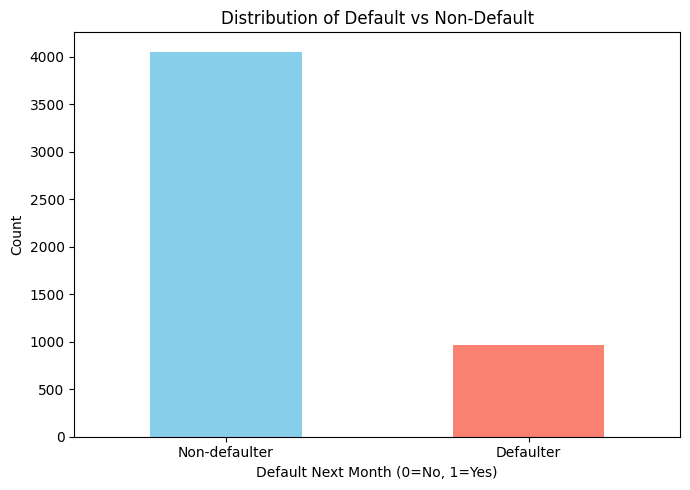

In [64]:
fig, ax = plt.subplots(figsize=(7, 5))
df1['next_month_default'].value_counts().plot(kind='bar',ax=ax,color=['skyblue','salmon'])
ax.set_title('Distribution of Default vs Non-Default')
ax.set_xlabel('Default Next Month (0=No, 1=Yes)')
ax.set_ylabel('Count')
ax.set_xticklabels(['Non-defaulter', 'Defaulter'], rotation=0)

# Display plot
plt.tight_layout()
plt.show()

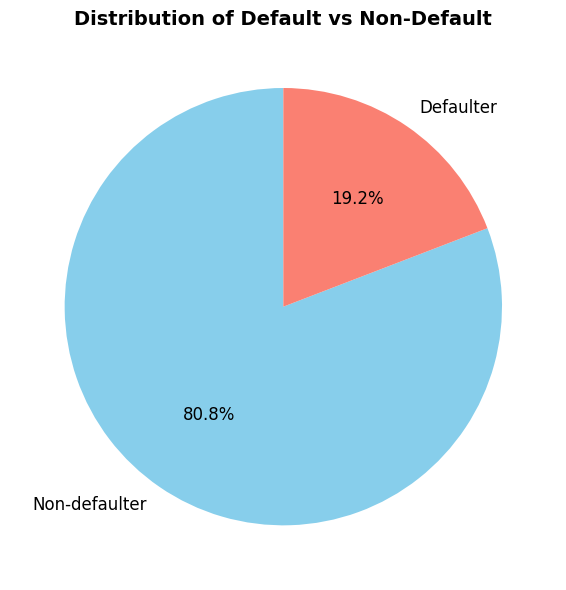

In [72]:
fig, ax = plt.subplots(figsize=(6, 6))
counts = df1['next_month_default'].value_counts()
labels = ['Non-defaulter', 'Defaulter']
colors = ['skyblue', 'salmon']

# Plot
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 12})
ax.set_title('Distribution of Default vs Non-Default', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()